# Project 2: Potential Flow

In this project, the concepts of simple flow superposition is explored to set up useful airfoil analysis tools. By defining singularity sources, sinks, and uniform flows and combining them to create more complex flows, we are able to calculate flow parameters over approximated complex surfaces with algrebraically simple elements.

## Problem 1: Freestream/source Superposition
The first section will focus on the superposition of a source and uniform flow. The source strength and freestream velocities will be varied separately to investigate their relative effects on the overall flow and the dividing streamline diameter.

### Problem 1.1: Superposition Plot
The resultant flow field of a point source and a uniform field is plotted and analyzed in the following code section. The flow field will be plotted and annotated with information on the dividing streamline and stagnation point.

<ipython-input-1-63665f8c8fb5>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-1-63665f8c8fb5>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


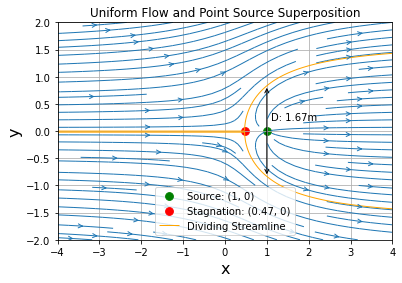

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# given from problem statement
freestream = 0.6
strength = 2

# The following functions are based on those found in the AeroPython tutorials
n = 201 # I'm using the extra +1 to help get cleaner increments in linspace                      
x_start, x_end = -4.0, 4.0           
y_start, y_end = -2.0, 2.0            
x = np.linspace(x_start, x_end, n)
y = np.linspace(y_start, y_end, n)   
X, Y = np.meshgrid(x, y)  

u_freestream = freestream * np.ones((n, n), dtype=float) # defining a uniform flow in the x-direction
v_freestream = np.zeros((n, n), dtype=float)
psi_freestream = freestream * Y # stream function for uniform flow

# this function is for the velocity at any point in the grid due to the source which sits at (xs, ys)
def get_velocity(strength, xs, ys, X, Y):
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    return u, v

# this one is for calculating the stream function of the source at any point in the grid
def get_stream_function(strength, xs, ys, X, Y):
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    return psi

xs = 1
ys = 0

u_source, v_source = get_velocity(strength, xs, ys, X, Y)
psi_source = get_stream_function(strength, xs, ys, X, Y)

# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
fig, ax = plt.subplots()
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.title('Uniform Flow and Point Source Superposition')
plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(xs, ys, color='g', s=60, marker='o', label=f'Source: ({xs}, {ys})')

# calculate the stagnation point
x_stagnation = xs - strength / (2 * np.pi * freestream)
y_stagnation = ys

# display the stagnation point
plt.scatter(x_stagnation, y_stagnation, color='r', s=60, marker='o', label=f'Stagnation: ({x_stagnation:.2f}, {y_stagnation})')

# display the dividing streamline
c = ax.contour(X, Y, psi, 
               levels=[-strength / 2, strength / 2], 
               colors=['orange'], linewidths=1, linestyles='solid')
c.collections[0].set_label('Dividing Streamline')

# display the diameter of the dividing streamline
path = c.collections[0].get_paths()[0]
vertices = path.vertices.copy()

# this is probably not the best way to find the endpoints of the dividing SL but it is the only working method I was able to come up with
for i in range(len(vertices)): # searching for the point on the contour that is above/below the point source origin
    if abs((xs - vertices[i][0])/xs*100) < 1: # I have to search in a small range here because the x-values are not clean
        vertex = vertices[i]
        arrow = plt.annotate(text='', xy=(vertex[0],vertex[1]), xytext=(vertex[0],-vertex[1]), arrowprops=dict(arrowstyle='<->')) # the diameter arrow
        plt.text((vertex[0]+0.1), 0.2, f'D: {(abs(vertex[1]*2)):.2f}m') # labeling and displaying the diameter length
        break # only do this search once


plt.legend()
plt.show()

### Problem 1.2: Source Strength and Freestream Variation
As the strength of the source and the freestream velocity change, we expect to see the location of the stagnation point and the dividing streamline change since the stagnation point is a function of the freestream velocity and the source strength. Those parameters are varied individually in the following code section to demonstrate how the parameters affect the stagnation point and dividing streamline.

<ipython-input-1-63665f8c8fb5>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-1-63665f8c8fb5>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


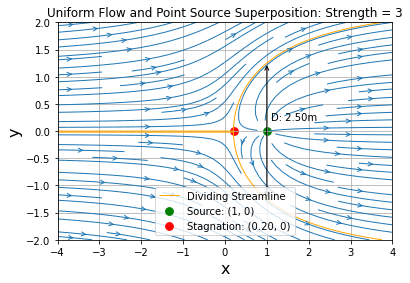

--------------------------------------
Tabulating stagnation points and dividing SL diameter
    Strength  Dividing SL Diameter    X_stag  Y_stag
0        2.0              1.666667  0.469484       0
1        2.1              1.750000  0.442958       0
2        2.2              1.833333  0.416432       0
3        2.3              1.916667  0.389906       0
4        2.4              2.000000  0.363380       0
5        2.5              2.080000  0.336854       0
6        2.6              2.160000  0.310329       0
7        2.7              2.240000  0.283803       0
8        2.8              2.333333  0.257277       0
9        2.9              2.416667  0.230751       0
10       3.0              2.500000  0.204225       0


In [20]:
import pandas as pd # for tabulating SL diam and stag points later
# holding freestream velocity constant, varying source strength from 2 to 3
freestream  = 0.6
strength = np.linspace(start=2, stop=3, num=11) # 0.1 increments
xs = 1
ys = 0

D = [] # SL diameters
stag_points_x = []
stag_points_y = []

# I could probably make this more modular and efficient by defining some functions but I am going the simpler/longer way
for i in range(len(strength)):
    # new stagnation point
    x_stagnation = xs - strength[i] / (2 * np.pi * freestream)
    y_stagnation = ys
    
    stag_points_x.append(x_stagnation)
    stag_points_y.append(y_stagnation)
    
    u_source, v_source = get_velocity(strength[i], xs, ys, X, Y) # new flow field from source
    psi_source = get_stream_function(strength[i], xs, ys, X, Y) # new SL's from source
    
    u_freestream = freestream * np.ones((n, n), dtype=float) # new freestream velocity and SL
    v_freestream = np.zeros((n, n), dtype=float)
    psi_freestream = freestream * Y 
    
    u = u_freestream + u_source # new superposition of freestream and source velocities and SL
    v = v_freestream + v_source
    psi = psi_freestream + psi_source
    
    fig, ax = plt.subplots()
    c = ax.contour(X, Y, psi, 
               levels=[-strength[i] / 2, strength[i] / 2], 
               colors=['orange'], linewidths=1, linestyles='solid') # I need to generate the points of the dividing SL curve
    path = c.collections[0].get_paths()[0] 
    vertices = path.vertices.copy()
    
    for j in range(len(vertices)): # searching for the point on the contour that is above/below the point source origin
        if abs((xs - vertices[j][0])/xs*100) < 1: # I have to search in a small range here because the x-values are not clean
            vertex = vertices[j] # found the point on contour that is (almost) directly above/below source
            d = abs(vertex[1]*2) # diameter is the twice the y-value
            D.append(d) # diameter is the twice the y-value
            break # only do this search once
    
    if i != len(strength)-1: # only plot the last one
        plt.close() # do not display the graph
    else:
        arrow = plt.annotate(text='', xy=(vertex[0],vertex[1]), xytext=(vertex[0],-vertex[1]), arrowprops=dict(arrowstyle='<->')) # the diameter arrow
        plt.text((vertex[0]+0.1), 0.2, f'D: {(abs(vertex[1]*2)):.2f}m') # labeling and displaying the diameter length
        c.collections[0].set_label('Dividing Streamline')

        plt.scatter(xs, ys, color='g', s=60, marker='o', label=f'Source: ({xs}, {ys})')
        plt.scatter(x_stagnation, y_stagnation, color='r', s=60, marker='o', label=f'Stagnation: ({x_stagnation:.2f}, {y_stagnation})')
        
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        
        plt.title('Uniform Flow and Point Source Superposition: Strength = 3')
        plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
        plt.grid()
        plt.legend()
        plt.show()
    #data.append([strength[i], D[i], x_stagnation, y_stagnation])
headers = ['Strength', 'Dividing SL Diameter', 'X_stag', 'Y_stag']
print('--------------------------------------')
print('Tabulating stagnation points and dividing SL diameter')
d = {'Strength': strength, 'Dividing SL Diameter': D, 'X_stag': stag_points_x, 'Y_stag': stag_points_y}
print(pd.DataFrame(d))

    

<ipython-input-1-63665f8c8fb5>:24: RuntimeWarning: invalid value encountered in true_divide
  u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
<ipython-input-1-63665f8c8fb5>:25: RuntimeWarning: invalid value encountered in true_divide
  v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)


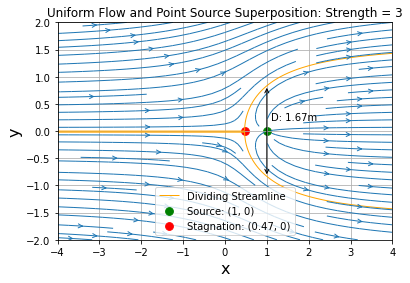

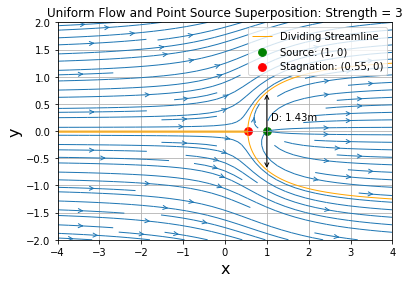

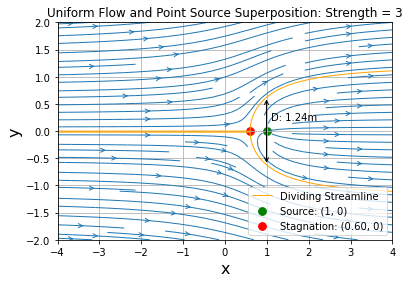

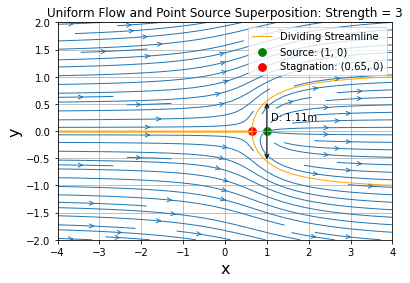

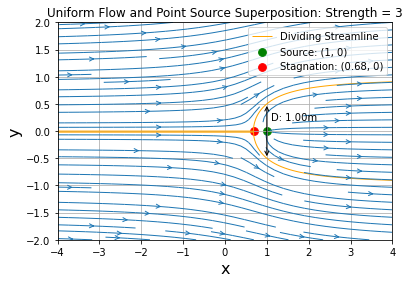

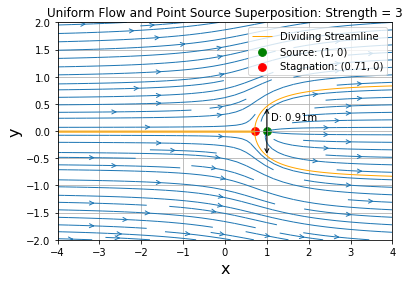

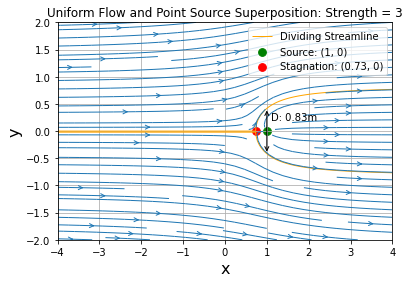

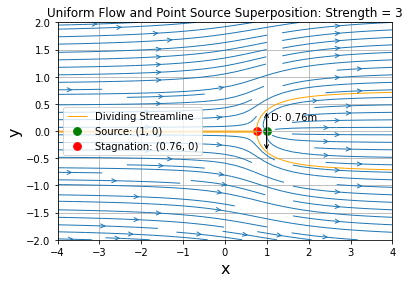

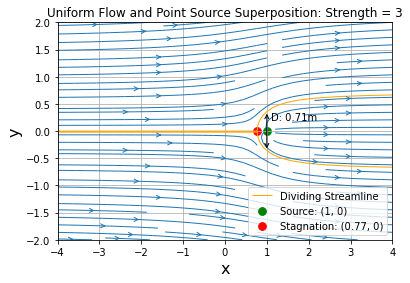

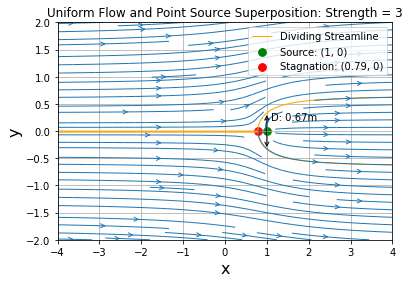

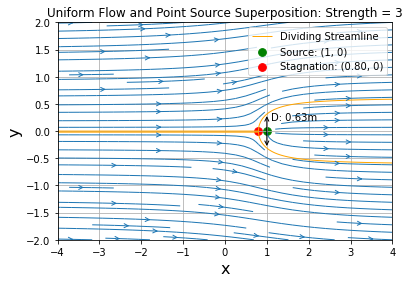

In [15]:
# Repeating the above but holding strength constant while varying freestream velocity
freestream  = np.linspace(start=0.6, stop=1.6, num=11)
strength = 2
xs = 1
ys = 0

D = [] # SL diameters
stag_points = []
data = []

# I could probably make this more modular and efficient by defining some functions but I am going the simpler/longer way
for i in range(len(freestream)):
    # new stagnation point
    x_stagnation = xs - strength / (2 * np.pi * freestream[i])
    y_stagnation = ys
    
    u_source, v_source = get_velocity(strength, xs, ys, X, Y) # new flow field from source
    psi_source = get_stream_function(strength, xs, ys, X, Y) # new SL's from source
    
    u_freestream = freestream[i] * np.ones((n, n), dtype=float) # new freestream velocity and SL
    v_freestream = np.zeros((n, n), dtype=float)
    psi_freestream = freestream[i] * Y 
    
    u = u_freestream + u_source # new superposition of freestream and source velocities and SL
    v = v_freestream + v_source
    psi = psi_freestream + psi_source
    
    fig, ax = plt.subplots()
    c = ax.contour(X, Y, psi, 
               levels=[-strength / 2, strength / 2], 
               colors=['orange'], linewidths=1, linestyles='solid') # I need to generate the points of the dividing SL curve
    path = c.collections[0].get_paths()[0] 
    vertices = path.vertices.copy()
    
    for j in range(len(vertices)): # searching for the point on the contour that is above/below the point source origin
        if abs((xs - vertices[j][0])/xs*100) < 1: # I have to search in a small range here because the x-values are not clean
            vertex = vertices[j] # found the point on contour that is (almost) directly above/below source
            d = abs(vertex[1]*2) # diameter is the twice the y-value
            D.append(d) # diameter is the twice the y-value
            break # only do this search once
    
    if i != len(freestream)-1: # only plot the last one
        plt.close() # do not display the graph
    else:
        arrow = plt.annotate(text='', xy=(vertex[0],vertex[1]), xytext=(vertex[0],-vertex[1]), arrowprops=dict(arrowstyle='<->')) # the diameter arrow
        plt.text((vertex[0]+0.1), 0.2, f'D: {(abs(vertex[1]*2)):.2f}m') # labeling and displaying the diameter length
        c.collections[0].set_label('Dividing Streamline')

        plt.scatter(xs, ys, color='g', s=60, marker='o', label=f'Source: ({xs}, {ys})')
        plt.scatter(x_stagnation, y_stagnation, color='r', s=60, marker='o', label=f'Stagnation: ({x_stagnation:.2f}, {y_stagnation})')
        
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        
        plt.title('Uniform Flow and Point Source Superposition: Freestream = 1.6')
        plt.streamplot(X, Y, u, v, density=1, linewidth=1, arrowsize=1, arrowstyle='->')
        plt.grid()
        plt.legend()
        plt.show()